<a href="https://colab.research.google.com/github/JaoSaraiva/gameblackjack/blob/main/Analisedadosredelojas_engjao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/kaggle/Sample - Superstore.csv.zip", encoding='latin-1') # Try reading the file with 'latin-1' encoding

In [ ]:
df.head(300)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,CA-2014-111451,12/26/2014,12/28/2014,First Class,KL-16555,Kelly Lampkin,Corporate,United States,Colorado Springs,...,80906,West,FUR-FU-10002918,Furniture,Furnishings,Eldon ClusterMat Chair Mat with Cordless Antis...,218.3520,3,0.20,-24.5646
296,297,CA-2014-111451,12/26/2014,12/28/2014,First Class,KL-16555,Kelly Lampkin,Corporate,United States,Colorado Springs,...,80906,West,OFF-BI-10004593,Office Supplies,Binders,Ibico Laser Imprintable Binding System Covers,78.6000,5,0.70,-62.8800
297,298,CA-2014-111451,12/26/2014,12/28/2014,First Class,KL-16555,Kelly Lampkin,Corporate,United States,Colorado Springs,...,80906,West,OFF-FA-10004854,Office Supplies,Fasteners,Vinyl Coated Wire Paper Clips in Organizer Box...,27.5520,3,0.20,9.2988
298,299,CA-2016-142545,10/28/2016,11/3/2016,Standard Class,JD-15895,Jonathan Doherty,Corporate,United States,Belleville,...,7109,East,OFF-PA-10002105,Office Supplies,Paper,Xerox 223,32.4000,5,0.00,15.5520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

Se caso eu tivesse a coluna 'Postal Code' faltando algum preenchimento de código postal, eu faria o seguinte scrit para adicionar um 0 no espaço vazio:
df["Postal Code"].fillna(0, inplace = True)
df["Postal Code"] = df["Postal Code"].astype(int)
Na saída obteria 9994 em Postal Code.

In [ ]:
#Verificação de duplicatas

if df.duplicated().sum() > 0: #
   print("Duplicatas encontradas")
else:
   print("Não há duplicatas encontradas")


Não há duplicatas encontradas


In [ ]:
#Segmentação do cliente

tipos_de_clientes = df['Segment'].unique()
print(tipos_de_clientes)

['Consumer' 'Corporate' 'Home Office']


In [ ]:
numero_de_clientes = df['Segment'].value_counts().reset_index()
numero_de_clientes = numero_de_clientes.rename(columns={'Segment': 'Tipo de Cliente'})
print(numero_de_clientes)

  Tipo de Cliente  count
0        Consumer   5191
1       Corporate   3020
2     Home Office   1783


([<matplotlib.patches.Wedge at 0x7b14fece4af0>,
 [Text(-0.06704018356682018, 1.0979551966211223, 'Consumer'),
  Text(-0.5268843289816147, -0.9656049419268699, 'Corporate'),
  Text(0.9316986195588344, -0.5847543777622897, 'Home Office')],
 [Text(-0.03656737285462918, 0.5988846527024302, '51.9%'),
  Text(-0.28739145217178985, -0.5266936046873835, '30.2%'),
  Text(0.5081992470320914, -0.31895693332488523, '17.8%')])

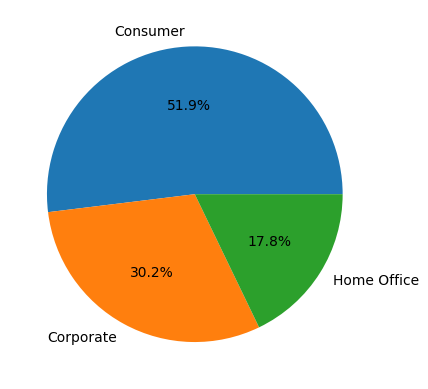

In [ ]:
from enum import auto
#Criando um gráfico de pizza com a segmentação de cliente

plt.pie(numero_de_clientes['count'], labels = numero_de_clientes['Tipo de Cliente'], autopct='%1.1f%%')

In [ ]:
#Clientes que geram mais receitas (CLTV) por valor médio de pedido ou têm o 'carrinho' mais recheado no momento da compra por seguimento
#Quanto custa adquirir os cliente de cada seguimento? CAC - Custo de Aquisição de Cliente
#Quão satisfeitos estão os clientes de cada seguimento ?
#Taxa de rotatividade por segmento?

#Modelo de seguimentação de clientes que prioriza segmentos com base em seu valor global e potencial de crescimento

vendas_por_cliente = df.groupby('Segment')['Sales'].sum().reset_index()
vendas_por_cliente = vendas_por_cliente.rename(columns={'Segment': 'Tipo de Cliente', 'Sales': 'Total de Vendas'})
print(vendas_por_cliente)

  Tipo de Cliente  Total de Vendas
0        Consumer     1.161401e+06
1       Corporate     7.061464e+05
2     Home Office     4.296531e+05


<BarContainer object of 3 artists>

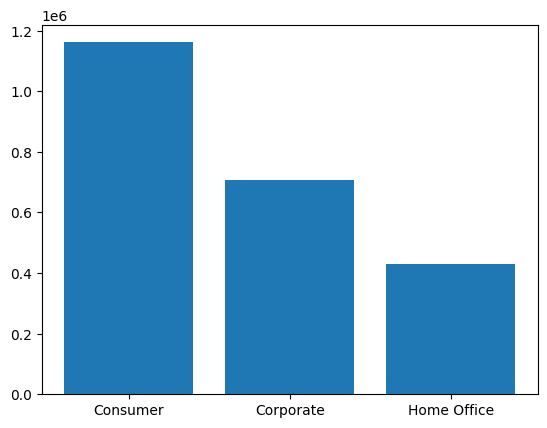

In [ ]:
#Traçando o gráfico de barras

plt.bar(vendas_por_cliente['Tipo de Cliente'], vendas_por_cliente['Total de Vendas'])

([<matplotlib.patches.Wedge at 0x7b14fca5a7d0>,
 [Text(-0.019255774590196492, 1.0998314485160587, 'Consumer'),
  Text(-0.5936661576864369, -0.9260456215639825, 'Corporate'),
  Text(0.9155113363994682, -0.609786022243918, 'Home Office')],
 [Text(-0.010503149776470813, 0.599908062826941, '50.6%'),
  Text(-0.3238179041926019, -0.5051157935803541, '30.7%'),
  Text(0.4993698198542553, -0.33261055758759156, '18.7%')])

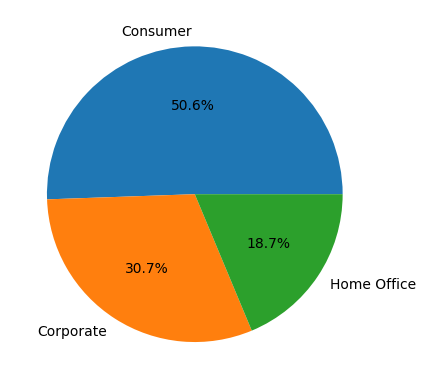

In [ ]:
#Clientes que geram mais receitas está compensando em relação ao seu custo de marketing gerado?
#Pesquisa de satisfação do cliente auxilia na melhora do atendimento e pesquisa de produto melhorando a rotatividade assim como programas de fidelização e indicação reduz os custos de aquisição desse
#clientes, pois, clientes satisfeitos trazem mais clientes
#Gráfico de pizza para vendas geradas:

plt.pie(vendas_por_cliente['Total de Vendas'], labels = vendas_por_cliente['Tipo de Cliente'], autopct='%1.1f%%')

In [ ]:
#Podemos disparar e-mails para os clientes mais assíduos com promoções,descontos, recompensas, baseados em compras anteriores, etc
#Fidelização

frequencia_de_compra_por_cliente = df.groupby(['Customer ID', 'Customer Name', 'Segment']) ['Order ID'].count().reset_index()
frequencia_de_compra_por_cliente.rename(columns={'Order ID': 'Total de Pedidos'}, inplace=True)
#Clientes com frequência de pedidos maior ou igual a 1:
frequencia_de_pedidos = frequencia_de_compra_por_cliente[frequencia_de_compra_por_cliente ['Total de Pedidos'] >= 1]
classificacao_frequencia_de_pedidos = frequencia_de_pedidos.sort_values(by = 'Total de Pedidos', ascending= False)

print(classificacao_frequencia_de_pedidos.head(12).reset_index(drop=True))


   Customer ID        Customer Name      Segment  Total de Pedidos
0     WB-21850        William Brown     Consumer                37
1     PP-18955           Paul Prost  Home Office                34
2     JL-15835             John Lee     Consumer                34
3     MA-17560         Matt Abelman  Home Office                34
4     SV-20365          Seth Vernon     Consumer                32
5     JD-15895     Jonathan Doherty    Corporate                32
6     CK-12205  Chloris Kastensmidt     Consumer                32
7     EH-13765         Edward Hooks    Corporate                32
8     EP-13915           Emily Phan     Consumer                31
9     ZC-21910     Zuschuss Carroll     Consumer                31
10    AP-10915       Arthur Prichep     Consumer                31
11    LC-16870        Lena Cacioppo     Consumer                30


Apesar de prevalecer o grupo de Consumidores, nota-se que o grupo Home Office tem um potencial significativo.

In [ ]:
#Identificando os clientes pelos valores das vendas ( apelidando de 'cliente gastador') e não pela quantidade para analisar custos de captação de cada cliente

cliente_gastador = df.groupby(['Customer ID', 'Customer Name', 'Segment']) ['Sales'].sum().reset_index()
top_cliente_gastador = cliente_gastador.sort_values(by = 'Sales', ascending= False)
print(top_cliente_gastador.head(12).reset_index(drop=True))

   Customer ID       Customer Name      Segment      Sales
0     SM-20320         Sean Miller  Home Office  25043.050
1     TC-20980        Tamara Chand    Corporate  19052.218
2     RB-19360        Raymond Buch     Consumer  15117.339
3     TA-21385        Tom Ashbrook  Home Office  14595.620
4     AB-10105       Adrian Barton     Consumer  14473.571
5     KL-16645        Ken Lonsdale     Consumer  14175.229
6     SC-20095        Sanjit Chand     Consumer  14142.334
7     HL-15040        Hunter Lopez     Consumer  12873.298
8     SE-20110        Sanjit Engle     Consumer  12209.438
9     CC-12370  Christopher Conant     Consumer  12129.072
10    TS-21370        Todd Sumrall    Corporate  11891.751
11    GT-14710           Greg Tran     Consumer  11820.120


Observa-se que William Brown não está na lista de Tops Gastadores. Porem, ele está em primeiro lugar como cliente mais assíduo. Desta forma concluimos que não é por ter uma boa frequência de compras que se gera uma boa receita.  Identifica-se também que o grupo Consumidor está no topo do grupo de clientes assíduos, mas nos Tops Gastadores quem está no topo é o grupo Home Office.

In [ ]:
#Quais métodos de envio os clientes preferem, quais os mais custosos, eficazes e confiáveis?

modelo_de_envio = df['Ship Mode'].value_counts().reset_index()
modelo_de_envio = modelo_de_envio.rename(columns={'Index': 'Uso Frequente', 'Ship Mode': 'Modo de Envio'})
print(modelo_de_envio)

    Modo de Envio  count
0  Standard Class   5968
1    Second Class   1945
2     First Class   1538
3        Same Day    543


Vemos que seguimos um padrão de envio: Standard Class.

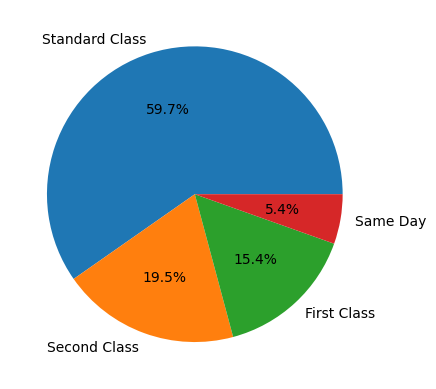

In [ ]:
#Construindo o gráfico de pizza sobre os padrões de envios:
plt.pie(modelo_de_envio['count'], labels=modelo_de_envio['Modo de Envio'], autopct='%1.1f%%') # Use the numeric 'count' column for values and 'Modo de Envio' for labels
plt.show()

In [ ]:
#Análise geográfica
#Estados

estado = df['State'].value_counts().reset_index()
estado = estado.rename(columns={'Index': 'Estado', 'State': 'Número de Clientes por Estado'})
print(estado.head(20))

   Número de Clientes por Estado  count
0                     California   2001
1                       New York   1128
2                          Texas    985
3                   Pennsylvania    587
4                     Washington    506
5                       Illinois    492
6                           Ohio    469
7                        Florida    383
8                       Michigan    255
9                 North Carolina    249
10                       Arizona    224
11                      Virginia    224
12                       Georgia    184
13                     Tennessee    183
14                      Colorado    182
15                       Indiana    149
16                      Kentucky    139
17                 Massachusetts    135
18                    New Jersey    130
19                        Oregon    124


In [ ]:
#Cidades

cidade = df['City'].value_counts().reset_index()
print(cidade.head(15))

             City  count
0   New York City    915
1     Los Angeles    747
2    Philadelphia    537
3   San Francisco    510
4         Seattle    428
5         Houston    377
6         Chicago    314
7        Columbus    222
8       San Diego    170
9     Springfield    163
10         Dallas    157
11   Jacksonville    125
12        Detroit    115
13         Newark     95
14       Richmond     90


In [ ]:
#Vendas por Estado

vendas_por_estado = df.groupby('State')['Sales'].sum().reset_index()
top_vendas_por_estado = vendas_por_estado.sort_values(by = 'Sales', ascending= False)
print(top_vendas_por_estado.head(10).reset_index(drop=True))

          State        Sales
0    California  457687.6315
1      New York  310876.2710
2         Texas  170188.0458
3    Washington  138641.2700
4  Pennsylvania  116511.9140
5       Florida   89473.7080
6      Illinois   80166.1010
7          Ohio   78258.1360
8      Michigan   76269.6140
9      Virginia   70636.7200


In [ ]:
#Vendas por Cidade

vendas_por_cidade = df.groupby(['City'])['Sales'].sum().reset_index()
top_vendas_por_cidade = vendas_por_cidade.sort_values(by = 'Sales', ascending= False)
print(top_vendas_por_cidade.head(10).reset_index(drop=True))

            City        Sales
0  New York City  256368.1610
1    Los Angeles  175851.3410
2        Seattle  119540.7420
3  San Francisco  112669.0920
4   Philadelphia  109077.0130
5        Houston   64504.7604
6        Chicago   48539.5410
7      San Diego   47521.0290
8   Jacksonville   44713.1830
9    Springfield   43054.3420


In [ ]:
#Produtos com melhores desempenhos

#Produtos existentes
produtos = df['Category'].unique()
print(produtos)
#Subcategorias dos produtos
subcategorias_de_produtos = df['Sub-Category'].unique()
print(subcategorias_de_produtos)

['Furniture' 'Office Supplies' 'Technology']
['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [ ]:
#Quantidade de subcategorias de cada produto

quant_subcategorias = df.groupby('Category')['Sub-Category'].nunique().reset_index()
quant_subcategorias = quant_subcategorias.sort_values(by='Sub-Category', ascending=False)
print(quant_subcategorias)

          Category  Sub-Category
1  Office Supplies             9
0        Furniture             4
2       Technology             4


In [ ]:
#Subcategoria com mais vendas

subcategoria_por_vendas = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()
subcategoria_por_vendas = subcategoria_por_vendas.sort_values(by = 'Sales', ascending= False)
print(subcategoria_por_vendas)

           Category Sub-Category        Sales
16       Technology       Phones  330007.0540
1         Furniture       Chairs  328449.1030
11  Office Supplies      Storage  223843.6080
3         Furniture       Tables  206965.5320
6   Office Supplies      Binders  203412.7330
15       Technology     Machines  189238.6310
13       Technology  Accessories  167380.3180
14       Technology      Copiers  149528.0300
0         Furniture    Bookcases  114879.9963
4   Office Supplies   Appliances  107532.1610
2         Furniture  Furnishings   91705.1640
10  Office Supplies        Paper   78479.2060
12  Office Supplies     Supplies   46673.5380
5   Office Supplies          Art   27118.7920
7   Office Supplies    Envelopes   16476.4020
9   Office Supplies       Labels   12486.3120
8   Office Supplies    Fasteners    3024.2800


In [ ]:
#Categoria com mais vendas

categoria_por_vendas = df.groupby(['Category'])['Sales'].sum().reset_index()
top_categoria_por_vendas = categoria_por_vendas.sort_values(by = 'Sales', ascending= False)
print(top_categoria_por_vendas.reset_index(drop=True))

          Category        Sales
0       Technology  836154.0330
1        Furniture  741999.7953
2  Office Supplies  719047.0320


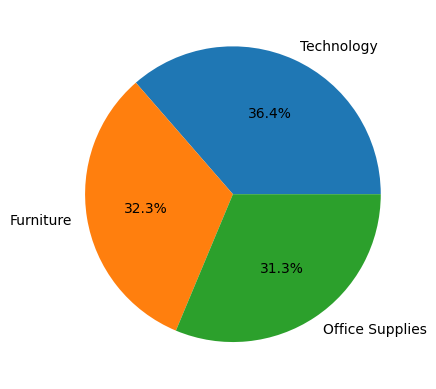

In [ ]:
#Construindo gráfico de pizza das categorias com mais vendas

plt.pie(top_categoria_por_vendas['Sales'], labels=top_categoria_por_vendas['Category'], autopct='%1.1f%%')
plt.show()

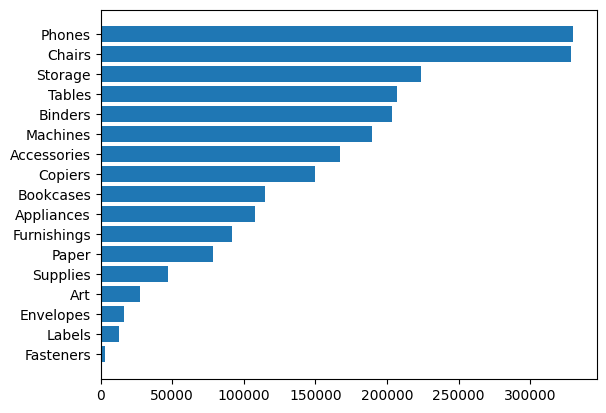

In [ ]:
#Gráfico subcategorias com mais vendas

subcategoria_por_vendas = subcategoria_por_vendas.sort_values(by = 'Sales', ascending= True)
plt.barh(subcategoria_por_vendas['Sub-Category'], subcategoria_por_vendas['Sales'])
plt.show()

Conclui que os investimentos com Phone e Chairs são mais rentáveis. Inclusive o marketing focado nestes produtos. Assim como os produtos na base do gráfico que são menos populares podem entrar em liquidação e serem descartados dos próximos orçamentos da loja.

In [ ]:
#Quantidade de vendas por ano
# Use the correct format string for month/day/year
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
vendas_por_ano = df.groupby(df['Order Date'].dt.year)['Sales'].sum()
vendas_por_ano = vendas_por_ano.reset_index()
vendas_por_ano = vendas_por_ano.rename(columns={'Order Date': 'Ano', 'Sales': 'Total de Vendas Anual'})
print(vendas_por_ano)

    Ano  Total de Vendas Anual
0  2014            484247.4981
1  2015            470532.5090
2  2016            609205.5980
3  2017            733215.2552


<BarContainer object of 4 artists>

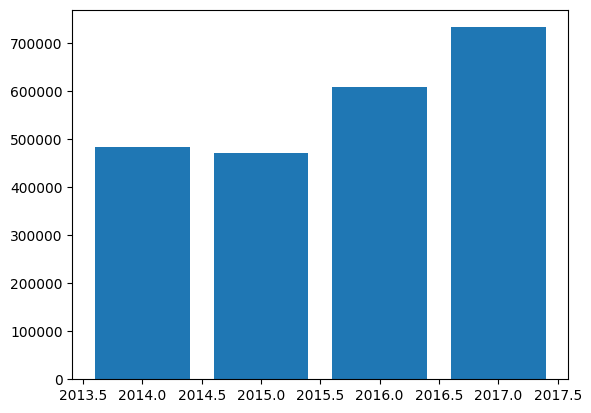

In [ ]:
#Construindo o gráfico de barras para as vendas anuais

plt.bar(vendas_por_ano['Ano'], vendas_por_ano['Total de Vendas Anual'])

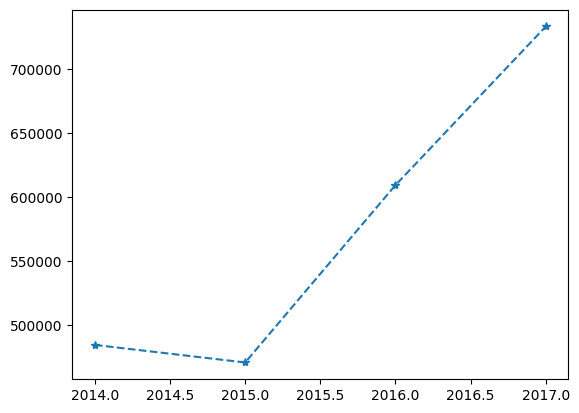

In [ ]:
#Construindo o gráfico de linhas para as vendas anuais
plt.plot(vendas_por_ano['Ano'], vendas_por_ano['Total de Vendas Anual'], marker='*', linestyle='--')


Observa-se que para trabalhar com estes comparativos onde não temos muitas informações no gráfico, a melhor opção é o gráfico de linha. Onde a declividade consegue demonstrar de forma mais clara as mudanças nos dados.

In [ ]:
#Vendas trimestrais

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
vendas_por_ano = df[df['Order Date'].dt.year == 2017]
vendas_por_trimestre = vendas_por_ano.resample('Q', on='Order Date')['Sales'].sum()
vendas_por_trimestre = vendas_por_trimestre.reset_index()
vendas_por_trimestre = vendas_por_trimestre.rename(columns={'Order Date': 'Trimestre', 'Sales': 'Total de Vendas Trimestral'})
print(vendas_por_trimestre)

   Trimestre  Total de Vendas Trimestral
0 2017-03-31                 123144.8602
1 2017-06-30                 133764.3720
2 2017-09-30                 196251.9560
3 2017-12-31                 280054.0670


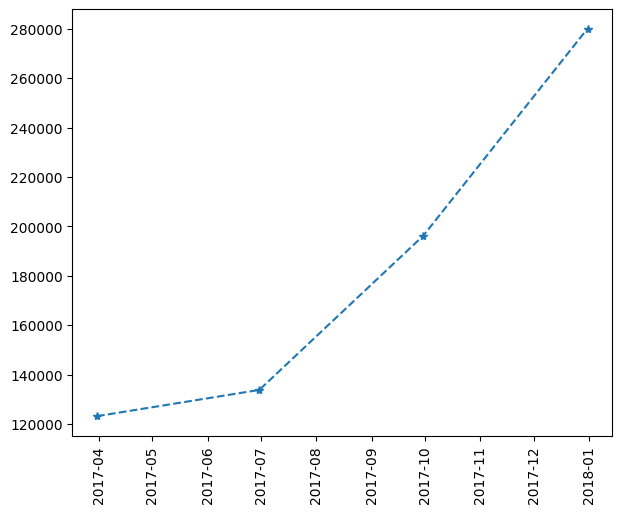

In [ ]:
#Construindo gráfico de linha para as vendas trimestrais

plt.plot(vendas_por_trimestre['Trimestre'], vendas_por_trimestre['Total de Vendas Trimestral'], marker='*', linestyle='--')

#Melhorando o layout do gráfico
plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

Podemos ver que há um aumento constante de vendas a partir de julho. Vários fatores podem ter cooperado para estas alterações: tendências sazonais, investimento em marketing, lançamento de um novo produto, segmentação de clientes. Nestas análises é importante buscar saber quais motivos elevaram este gráfico para que possamos utilizar da mesma estratégia em oportunas ocasiões.

In [ ]:
#Vendas mensais

df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)
vendas_por_ano = df[df['Order Date'].dt.year == 2017]
vendas_por_mes = vendas_por_ano.resample('M', on='Order Date')['Sales'].sum()
vendas_por_mes = vendas_por_mes.reset_index()
vendas_por_mes = vendas_por_mes.rename(columns={'Order Date': 'Mês', 'Sales': 'Total de Vendas Mensal'})
print(vendas_por_mes)

          Mês  Total de Vendas Mensal
0  2017-01-31              43971.3740
1  2017-02-28              20301.1334
2  2017-03-31              58872.3528
3  2017-04-30              36521.5361
4  2017-05-31              44261.1102
5  2017-06-30              52981.7257
6  2017-07-31              45264.4160
7  2017-08-31              63120.8880
8  2017-09-30              87866.6520
9  2017-10-31              77776.9232
10 2017-11-30             118447.8250
11 2017-12-31              83829.3188


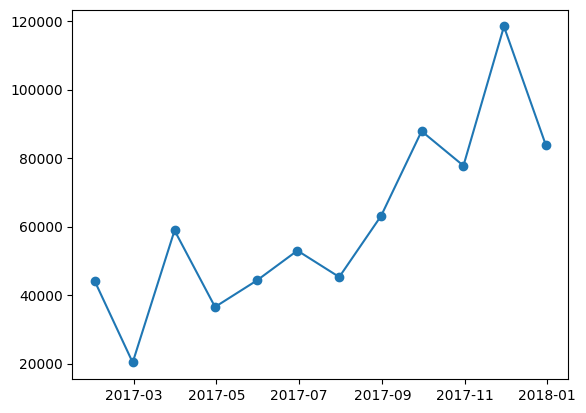

In [ ]:
#Construindo gráfico de linha para as vendas mensais

plt.plot(vendas_por_mes['Mês'], vendas_por_mes['Total de Vendas Mensal'], marker='o', linestyle='-')

Neste gráfico podemos ver que as vendas estão crescendo mês após mês. Podemos concluir que as vendas estão saudáveis. Em especial os meses de Julho a Outubro, podendo ser uma situação sazonal. Pode se programar para estoques de produtos para estes meses sazonais. Nos meses não sazonais, pode se programar ideias de marketing mais pesados, promoções, etc.
O ideal é fazer análises de vendas em intervalos de 5 anos para podermos chegar em conclusões mais precisas.

In [ ]:
#Mapeamento das Vendas por Estado

import plotly.graph_objects as go
from plotly.subplots import make_subplots

import plotly.io as pio

#Criando um mapeamento para todos os 50 Estados

mapeando_todos_estados = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI',
    'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
    'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO',
    'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
    'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA',
    'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

#Adicionando coluna de abreviação no DataFrame

df['Abreviação'] = df['State'].map(mapeando_todos_estados)

#Agrupando por estado e calculando a soma das vendas

soma_das_vendas = df.groupby('State')['Sales'].sum().reset_index()

#Adicionando abreviação a soma_das_vendas

soma_das_vendas['Abreviação'] = soma_das_vendas['State'].map(mapeando_todos_estados)

#Mapeando com cores usando Plotly (biblioteca de criação de gráficos interativos)

fig = go.Figure(data=go.Choropleth(
    locations = soma_das_vendas['Abreviação'],
    locationmode = 'USA-states',
    z= soma_das_vendas['Sales'],
    hoverinfo = 'location+z',
    colorscale = 'inferno'
))

fig.update_geos(projection_type='albers usa')
fig.update_layout(
    geo_scope='usa',
    title = 'Total de Vendas por Estado - USA'
)

fig.show()


Neste projeto podemos visualizar de forma mais ampla que onde as cores estão com tons mais escuros, temos maior chances de vendas e merece investigação sobre um futuro investimento nesta região.

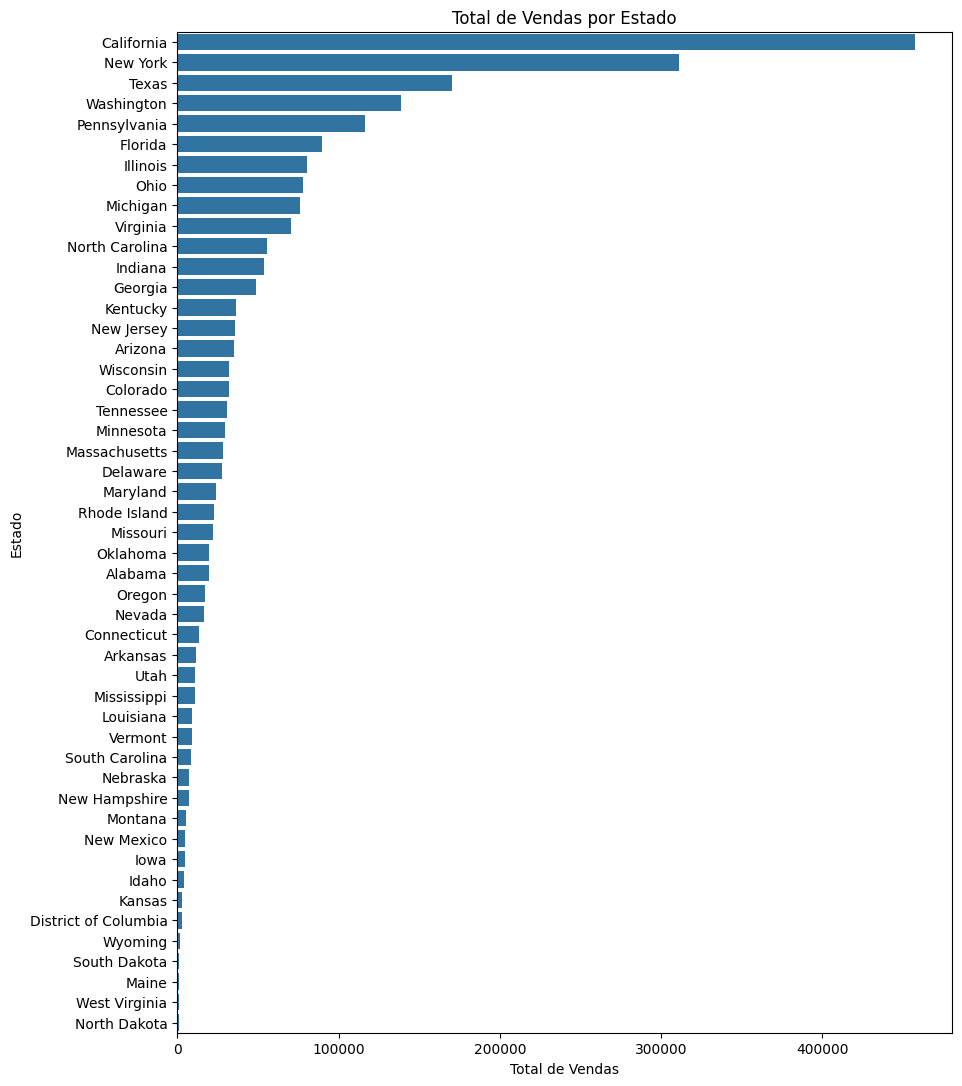

In [ ]:
#Criando um gráfico de barras a partir do nosso mapeamento

#classificando o dataframe pela coluna 'Sales' em ordem decrescente
soma_das_vendas = soma_das_vendas.sort_values(by='Sales', ascending=False)

#Criando o gráfico de barras horizontal
plt.figure(figsize=(10, 13))
ax = sns.barplot(x='Sales', y='State', data=soma_das_vendas, errorbar=None)

plt.title('Total de Vendas por Estado')
plt.xlabel('Total de Vendas')
plt.ylabel('Estado')
plt.show()

In [ ]:
#Resumindo os dados de vendas por categoria e subcategoria em um gráfico aninhado
import plotly.express as px

#Resumindo os dados de vendas por categoria e subcategoria

df_resumo = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

#Criando um Gráfico de Pizza Aninhado

fig = px.sunburst(
    df_resumo, path=['Category', 'Sub-Category'], values='Sales')
fig.show()

In [ ]:
#Resumindo os dados de vendas por Categoria, Modo de Envio e Subcategorias

df_resumo = df.groupby(['Category', 'Ship Mode', 'Sub-Category'])['Sales'].sum().reset_index()

#Criando um Treemap

fig = px.treemap(df_resumo, path=['Category', 'Ship Mode', 'Sub-Category'], values='Sales')

fig.show()